# Ensemble Learning

## Contents

* Introduction
* Application on dataset

   * Data Visualization
   
   * Modeling and Test Model
   
     * Randomforest
     * MLPClassifier
     * LogisticRegression
     * BaggingClassifier
     * VotingClassifier
     * DecisionTreeClassifier
  * Classification report
* Error Analysis

## Introduction

Ensemble learning is a machine learning technique that combines multiple individual models to improve the accuracy and robustness of the overall prediction. The idea is to combine the predictions of different models to create a single, more accurate prediction.

Ensemble learning can be used in both supervised and unsupervised learning problems. In supervised learning, ensemble methods are used to combine the outputs of multiple models trained on the same dataset, while in unsupervised learning, they are used to combine the outputs of different clustering or anomaly detection algorithms.


Here are some of the most popular ensemble learning algorithms:

Bagging (Bootstrap Aggregating): As mentioned earlier, this algorithm involves training multiple models on different subsets of the data and then averaging their predictions to make the final prediction.

Boosting: This algorithm trains a sequence of weak models, where each new model tries to improve the errors made by the previous model. The final prediction is obtained by combining the predictions of all models.

Stacking: This algorithm involves training multiple models and then using the output of those models as input to a new model. The new model is then trained to make the final prediction.

Random Forest: This algorithm is an extension of bagging, where multiple decision trees are trained on different subsets of the data. The final prediction is obtained by averaging the predictions of all decision trees.

AdaBoost (Adaptive Boosting): This algorithm is an extension of boosting, where each weak learner is assigned a weight based on its accuracy, and the final prediction is obtained by combining the weighted predictions of all models.

Gradient Boosting: This algorithm is also an extension of boosting, where each new model is trained to correct the errors made by the previous model.

XGBoost: This is an optimized implementation of gradient boosting that uses a more efficient algorithm and a variety of regularization techniques.

Ensemble learning has become a popular and effective technique in machine learning and is widely used in various applications.

## Advanced Ensemble Techniques

### Bagging

Bagging or Bootstrap Aggregation is a parallel ensemble learning technique to reduce the variance in the final prediction.

The Bagging process is very similar to averaging, the only difference is that bagging uses random sub-samples of the original dataset to train the same/multiple models and then combines the prediction, whereas in averaging the same dataset is used to train models. Hence the technique is called Bootstrap Aggregation as it combines both Bootstrapping (or Sampling of data) and Aggregation to form an ensemble model.

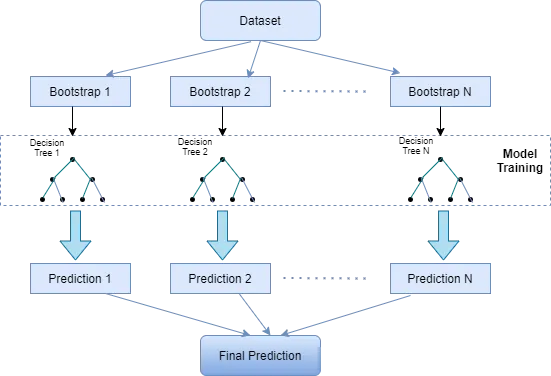

### Boosting

Boosting is a sequential ensemble learning technique to convert weak base learners to strong learner that performs better and is less biased. The intuition here is that individual models may not perform very well on the entire dataset, but they work well on some parts of the entire dataset. Hence each model in the ensemble actually boosts the overall performance.

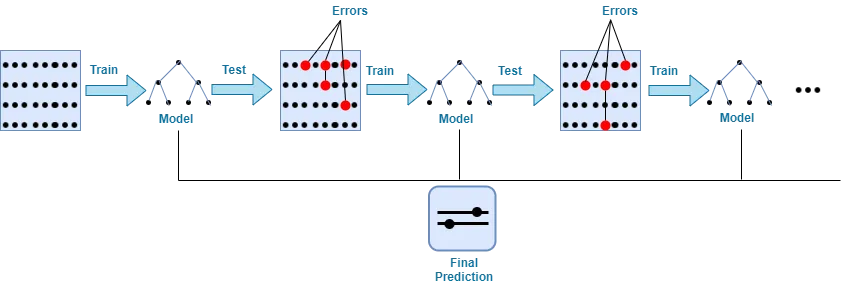


### Stacking

Stacking, also known as stacked generalization, is an ensemble learning technique that combines multiple machine learning algorithms via meta learning (either a meta-classifier or a meta-regressor).

The base-level algorithms are trained on the entire training dataset, and then the meta-model is trained on the predictions from all the base-level models as features. The base models are called level-0 models, and the meta-model which combines the base model's predictions is called a level-1 model.

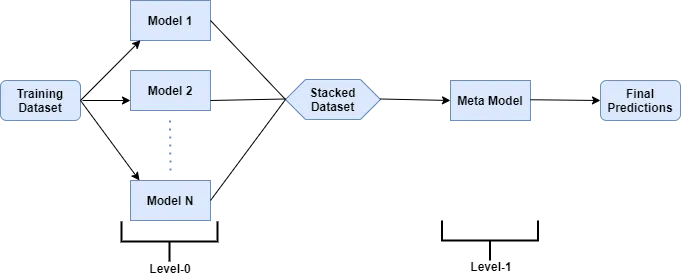

## Application On Dataset

Lets import some packages needed.

In [1]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Prepare Data

In [5]:
df = pd.read_csv("/Users/liusiling/Desktop/semester2/577/transfusion.csv") 
df.shape

(748, 5)

## Data Visualization

In [10]:
df.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [12]:
df.columns = ['Recency','Frequency ','Monetary','Time','whether_donate']

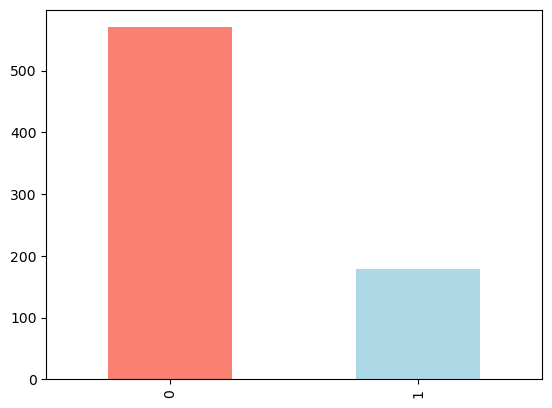

In [13]:
# Plot the value counts with a bar graph
df.whether_donate.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [14]:
df.describe()

,Recency,Frequency,Monetary,Time,whether_donate
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


## Modeling

In [32]:
X = df.drop("whether_donate", axis=1)

y = df["whether_donate"]

In [33]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2) 

### Randomforest

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
rf.score(X_test, y_test)

0.7266666666666667

#### Error Analysis

In [53]:
y_hat = rf.predict(X_test)
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.27
Sum Squared Error: 41
Sum Squared Total: 27.87
R^2: -0.47


### MLPClassifier

In [54]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [55]:
mlp.score(X_test, y_test)

0.7066666666666667

#### Error Analysis

In [56]:
y_hat = mlp.predict(X_test)
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.29
Sum Squared Error: 44
Sum Squared Total: 27.87
R^2: -0.58


### LogisticRegression

In [57]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [58]:
lg.score(X_test, y_test)

0.76

#### Error Analysis

In [59]:
y_hat = lg.predict(X_test)
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.24
Sum Squared Error: 36
Sum Squared Total: 27.87
R^2: -0.29


### BaggingClassifier

In [60]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)

BaggingClassifier()

In [61]:
bag.score(X_test, y_test)

0.7133333333333334

#### Error Analysis

In [62]:
y_hat = bag.predict(X_test)
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.29
Sum Squared Error: 43
Sum Squared Total: 27.87
R^2: -0.54


### VotingClassifier

In [63]:
voting= VotingClassifier([('lr', lg),
                              ('rf', rf),
                              ('mlp', mlp)], voting = 'hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('mlp', MLPClassifier())])

In [64]:
voting.score(X_test, y_test)

0.76

#### Error Analysis

In [65]:
y_hat = voting.predict(X_test)
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.24
Sum Squared Error: 36
Sum Squared Total: 27.87
R^2: -0.29


### DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
dt.score(X_test, y_test)

0.6533333333333333

#### Error Analysis

In [68]:
y_hat = dt.predict(X_test)
# MSE
MSE = (1/X_test.shape[0])*sum((y_hat - y_test)**2)
print(f"Mean Squared Error: {np.round(MSE,2)}")

# SSE
SSE = sum((y_hat - y_test)**2)
print(f"Sum Squared Error: {np.round(SSE,2)}")

# SST
SST = sum((y_test - np.mean(y_test))**2)
print(f"Sum Squared Total: {np.round(SST,2)}")

# R_2
R_2 = 1-SSE/SST
print(f"R^2: {np.round(R_2,2)}")

Mean Squared Error: 0.35
Sum Squared Error: 52
Sum Squared Total: 27.87
R^2: -0.87
